In [1]:


#import Keras packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
from tensorflow.keras.utils import plot_model
import tensorflow as tf



In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10000 files belonging to 10 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1008 files belonging to 10 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[154.5  145.5  162.5 ]
   [140.5  131.5  148.5 ]
   [153.75 144.75 161.75]
   ...
   [121.   110.   124.  ]
   [130.   119.   133.  ]
   [144.25 133.25 147.25]]

  [[153.25 144.25 161.25]
   [149.   140.   157.  ]
   [143.   134.   151.  ]
   ...
   [139.5  128.5  142.5 ]
   [157.25 146.25 160.25]
   [141.5  130.5  144.5 ]]

  [[152.25 143.25 160.25]
   [139.25 130.25 147.25]
   [159.5  150.5  167.5 ]
   ...
   [154.   143.   157.  ]
   [176.5  165.5  179.  ]
   [148.   137.   151.  ]]

  ...

  [[164.   152.   164.  ]
   [156.75 144.75 156.75]
   [154.   142.   154.  ]
   ...
   [142.5  130.5  140.5 ]
   [135.75 123.75 133.75]
   [146.25 134.25 144.25]]

  [[157.75 145.75 157.75]
   [154.75 142.75 154.75]
   [149.75 137.75 149.75]
   ...
   [146.5  134.5  144.5 ]
   [148.5  136.5  146.5 ]
   [151.25 139.25 149.25]]

  [[164.   152.   164.  ]
   [150.25 138.25 150.25]
   [161.25 149.25 161.25]
   ...
   [146.25 134.25 144.25]
   [134.   122.   132.  ]
   [128.5  116.5  12

In [6]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Input

np.random.seed(1337)

classifier = Sequential()

# Add the input layer explicitly using Input()
classifier.add(Input(shape=(128, 128, 3)))

classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Convolution2D(16, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

classifier.add(Convolution2D(8, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), padding='same'))



In [7]:
model = Sequential()

In [ ]:
classifier.add(Flatten())

In [9]:
#hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate= 0.5))

In [10]:
#output layer
classifier.add(Dense(units = 10, activation = 'softmax'))

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Step 1: Data Loading
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'train',
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    'valid',
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'
)

# Get number of output classes
num_classes = len(training_set.class_indices)

# Step 2: Define the Model
classifier = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

Found 10000 images belonging to 10 classes.
Found 1008 images belonging to 10 classes.


c:\Users\ayush\anaconda3\envs\tflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,586 (25.36 MB)

 Trainable params: 6,648,586 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
test_set = test_datagen.flow_from_directory(
        'valid',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical')

Found 1008 images belonging to 10 classes.


In [16]:
print("Training samples:", training_set.samples)
print("Validation samples:", test_set.samples)
print("Batch size:", training_set.batch_size)


Training samples: 10000
Validation samples: 1008
Batch size: 64


In [17]:
history = classifier.fit(
    training_set,
    steps_per_epoch=len(training_set),  # Number of batches per epoch
    epochs=30,
    validation_data=test_set,
    validation_steps=len(test_set)  # Number of validation batches per epoch
)




c:\Users\ayush\anaconda3\envs\tflow_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 0.2637 - loss: 2.0343 - val_accuracy: 0.5595 - val_loss: 1.1667
Epoch 2/30
 43/157 ━━━━━━━━━━━━━━━━━━━━ 2:52 2s/step - accuracy: 0.6341 - loss: 1.1058

KeyboardInterrupt: 

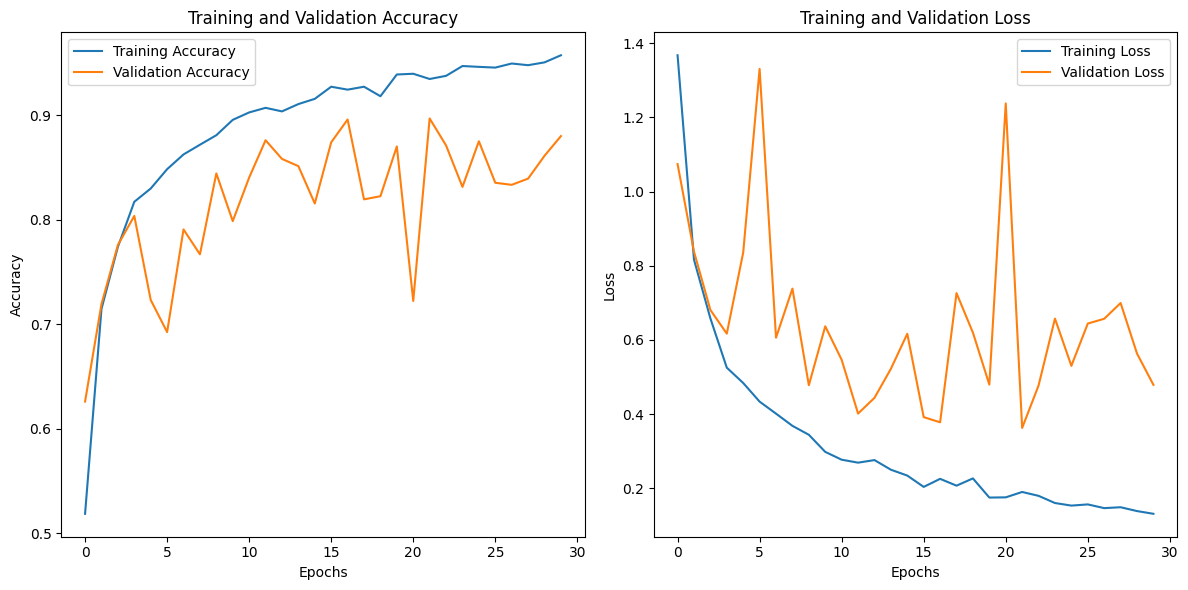

In [ ]:
# Plot accuracy
# Plot accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Model Evaluation on Training set
train_loss, train_acc = classifier.evaluate(training_set)
print(f"Training Accuracy: {train_acc:.4f}, Training Loss: {train_loss:.4f}")

# Model Evaluation on Validation set
val_loss, val_acc = classifier.evaluate(test_set)
print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 130s 825ms/step - accuracy: 0.9867 - loss: 0.0389
Training Accuracy: 0.9881, Training Loss: 0.0376
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 432ms/step - accuracy: 0.8605 - loss: 0.5962
Validation Accuracy: 0.8800, Validation Loss: 0.4787


In [ ]:
print(train_loss,train_acc)

0.037634704262018204 0.988099992275238


In [ ]:
print(val_loss,val_acc)

0.47869953513145447 0.879960298538208


In [ ]:
class_name = test_set.class_indices
class_name


{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [ ]:
classifier.save('full_model.h5')

In [ ]:
print('Saved trained model as %s ' % 'full_model.h5')

Saved trained model as full_model.h5 
